# Logistic Regression - Predicting the stock market!

This regression lab will show you how to predict movements in the stock market using publically available data. **Get ready to get rich!**

In [19]:
library(ISLR)
?Smarket

Smarket {ISLR},R Documentation


In [2]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [3]:
cor(Smarket[,-9]) #drop the 9th column (Direction) because it is not numeric

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


In [4]:
attach(Smarket) #attach names from dataframe to varaible space

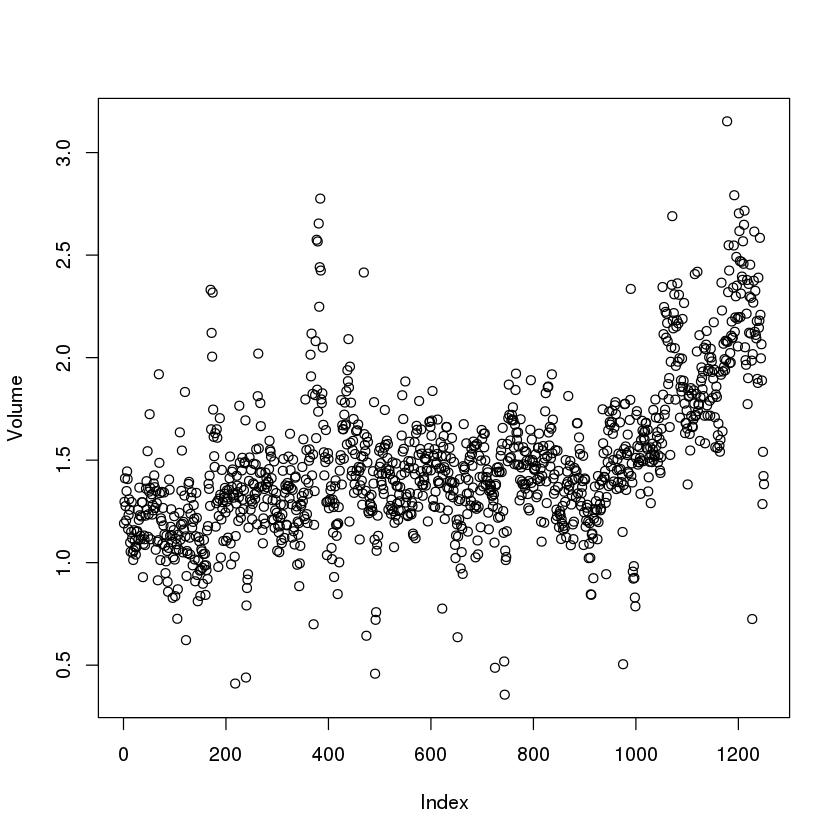

In [5]:
plot(Volume)

## Logistic Regression of Market Direction on past days

In [6]:
glm.fit=glm(Direction ~ Lag1 + Lag2+Lag3+Lag4+Lag5 + Volume, family = binomial, data = Smarket)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


### This sucks. The coefficients are close to zero...

In [7]:
coef(glm.fit) #get vector of coefficients

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

In [8]:
names(summary(glm.fit)) #the summry funciton has a "named list" of entries

[1] "call"           "terms"          "family"         "deviance"      
 [5] "aic"            "contrasts"      "df.residual"    "null.deviance" 
 [9] "df.null"        "iter"           "deviance.resid" "coefficients"  
[13] "aliased"        "dispersion"     "df"             "cov.unscaled"  
[17] "cov.scaled"

In [9]:
summary(glm.fit)$coef # we can extract each of theses entries by name

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.126000257,0.24073574,-0.5233966,0.6006983
Lag1,-0.073073746,0.05016739,-1.4565986,0.1452272
Lag2,-0.042301344,0.05008605,-0.8445733,0.3983491
Lag3,0.011085108,0.04993854,0.2219750,0.8243333
Lag4,0.009358938,0.04997413,0.1872757,0.8514445
Lag5,0.010313068,0.04951146,0.2082966,0.8349974
Volume,0.135440659,0.15835970,0.8552723,0.3924004


In [10]:
summary(glm.fit)$coef[,4] # and we can index each entry to get a column (or row). Here we extract the p.values

(Intercept)        Lag1        Lag2        Lag3        Lag4        Lag5 
  0.6006983   0.1452272   0.3983491   0.8243333   0.8514445   0.8349974 
     Volume 
  0.3924004

### This is really DEPRESSING. The coefficients are close to zero AND the p-values are large...

I swear, I have a buddy on the internet who told me this works. Let's try predicting anyway.

In [11]:
glm.probs=predict(glm.fit,type="response")
glm.probs[1:5] #look at the first 5 entries

1         2         3         4         5 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812

In [12]:
glm.pred=rep("Down",1250) #initialize vector to "Down" for all 1250 entries
glm.pred[glm.probs > .5]="Up"

table(glm.pred,Direction) #create a "confusion matrix"

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [13]:
mean(glm.pred==Direction) #how many times, on average, did we predict correctly

[1] 0.5216

## OK. This is better, we seem to be be predicting above chance. Now we're talkin real money!

But this is the hit rate on the training sample (i.e. "in-sample"). We should check it on a test sample.

So let's re-do the analysis on the years 2001-2004, then predict for 2005.

In [20]:
train=(Year<2005) # this creates a dummy variable for the year 2005. We can use it to index all the other variables
Smarket.2005=Smarket[!train,] #creates a submatrix dataset for observations from 2005. The "!" opeartor is a logical "not"
Direction.2005=Direction[!train]
dim(Smarket.2005)

[1] 252   9

In [16]:
glm.fit=glm(Direction ~ Lag1 + Lag2+Lag3+Lag4+Lag5 + Volume, family = binomial, data = Smarket, subset=train)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket, subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.302  -1.190   1.079   1.160   1.350  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.191213   0.333690   0.573    0.567
Lag1        -0.054178   0.051785  -1.046    0.295
Lag2        -0.045805   0.051797  -0.884    0.377
Lag3         0.007200   0.051644   0.139    0.889
Lag4         0.006441   0.051706   0.125    0.901
Lag5        -0.004223   0.051138  -0.083    0.934
Volume      -0.116257   0.239618  -0.485    0.628

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.1  on 991  degrees of freedom
AIC: 1395.1

Number of Fisher Scoring iterations: 3


In [17]:
glm.probs=predict(glm.fit,Smarket.2005,type="response")

glm.pred=rep("Down",252) #initialize vector to "Down" for all 1250 entries
glm.pred[glm.probs > .5]="Up"

table(glm.pred,Direction.2005) #create a "confusion matrix"

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

In [18]:
mean(glm.pred==Direction.2005)

[1] 0.4801587

### Crap! It appears our hit rate is worse than chance (50/50).... Time to quit finance and get a real job I guess....